https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe

In [4]:
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML

In [5]:
pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'



<ipython-input-5-a8661c9d7d70>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
dogs = pd.read_csv('./input/labels.csv')
# dogs = dogs.sample(20)
dogs['file'] = dogs.id.map(lambda id: f'./input/images/{id}.jpeg')
dogs['image'] = dogs.file.map(lambda f: get_thumbnail(f))
dogs.head()

,id,file,image
0,1,./input/images/1.jpeg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x112 at 0x7FE810497DF0>
1,2,./input/images/2.jpeg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x86 at 0x7FE80FC4C490>


,id,image
0,1,
1,2,

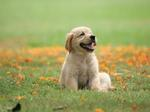
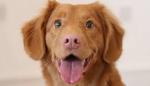

In [7]:
# displaying PIL.Image objects embedded in dataframe
HTML(dogs[['id', 'image']].to_html(formatters={'image': image_formatter}, escape=False))